In [1]:
#import dependencies
from pathlib import Path
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
#Create a path to the data
path = Path("../Resources/clean_consolidated_data.csv")

#read the data and convert it to a dataframe
df=pd.read_csv(path, low_memory=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,UNITID,Institution Name,State,Region,Predominant Degree,Type of School,Admission Rate,Instate Tuition and Fees,...,Bachelor of Engineering,Bachelor of English,Bachelor of Bio / Biomedical Sci,Bachelor of Math,Bachelor of Philosophy/Religion,Bachelor of Psychology,Bachelor of Social Science,Bachelor of Visual / Performing Arts,Bachelor of Business / Marketing,Bachelor of History
0,0,0,100654,Alabama A & M University,AL,Southeast,3,Public,0.5010,6828.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1,1,100663,University of Alabama at Birmingham,AL,Southeast,3,Public,0.7223,6264.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,3,100706,University of Alabama in Huntsville,AL,Southeast,3,Public,0.6368,8094.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,4,100724,Alabama State University,AL,Southeast,3,Public,0.5080,8082.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,4,5,100751,The University of Alabama,AL,Southeast,3,Public,0.4353,8600.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'UNITID', 'Institution Name', 'State',
       'Region', 'Predominant Degree', 'Type of School', 'Admission Rate',
       'Instate Tuition and Fees', 'Out of State Tuition and Fees',
       'Median Debt Original Amount', 'Median Debt at Graduation',
       'Debt repayment rate among grads - 1 year',
       'Debt repayment rate among grads - 3 years',
       'Debt repayment rate among grads - 5 years',
       'Mean earnings 6 years after school entry',
       'Mean earnings 10 years after school entry', 'Bachelor of Agriculture',
       'Bachelor of Ethnic, Cultural or Gender Studies',
       'Bachelor of Comms - Journalism', 'Bachelor of Comp Sci / IT',
       'Bachelor of Education', 'Bachelor of Engineering',
       'Bachelor of English', 'Bachelor of Bio / Biomedical Sci',
       'Bachelor of Math', 'Bachelor of Philosophy/Religion',
       'Bachelor of Psychology', 'Bachelor of Social Science',
       'Bachelor of Visual / Performing Arts',
     

In [139]:
#Bar chart for Region vs. Debt repayment rate 5 years - mean

region_mean_df= df.groupby(["Region"], as_index=False)['Debt repayment rate among grads - 5 years'].mean()
region_mean_df = region_mean_df.sort_values(by="Debt repayment rate among grads - 5 years", ascending=False)
region_med_df= df.groupby(["Region"], as_index=False)['Debt repayment rate among grads - 5 years'].median()
region_med_df = region_med_df.sort_values(by="Debt repayment rate among grads - 5 years", ascending=False)


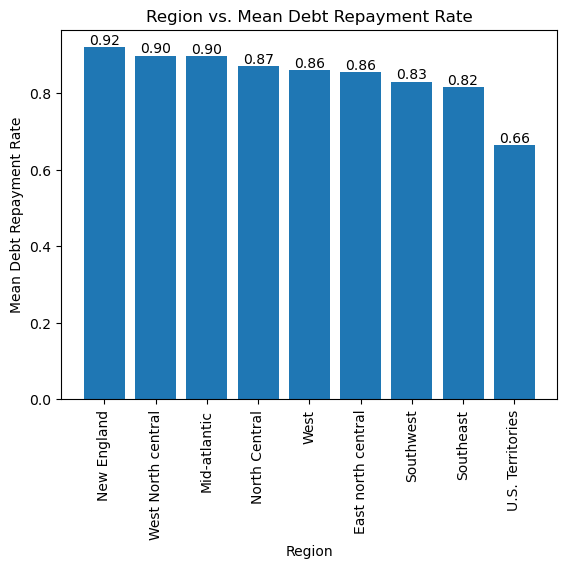

In [180]:

#Bar chart for Region vs. Debt repayment rate 5 years
bar_label=region_mean_df['Debt repayment rate among grads - 5 years'].values.tolist()
bar_label= [ '%.2f' % elem for elem in bar_label ]

#plot just the column of data collected and format the data labels
barplot=plt.bar(region_mean_df['Region'], region_mean_df['Debt repayment rate among grads - 5 years'])
plt.xlabel("Region")
plt.ylabel("Mean Debt Repayment Rate")
plt.title("Region vs. Mean Debt Repayment Rate")
plt.bar_label(barplot,labels=bar_label, label_type="edge")
plt.xticks(rotation=90)
plt.savefig('Resources/Fig1ky.png', bbox_inches='tight') 
plt.show()

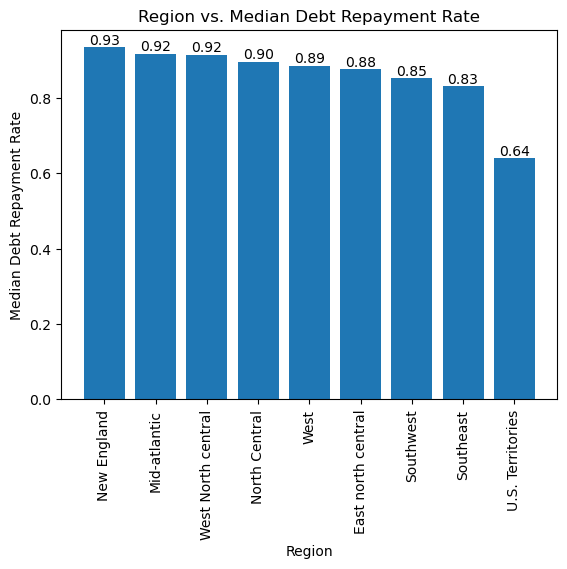

In [149]:
#median debt repayment rate chart
bar_label=region_med_df['Debt repayment rate among grads - 5 years'].values.tolist()
bar_label= [ '%.2f' % elem for elem in bar_label ]

bar_plot = plt.bar(region_med_df['Region'], region_med_df['Debt repayment rate among grads - 5 years'])
plt.xlabel("Region")
plt.ylabel("Median Debt Repayment Rate")
plt.title("Region vs. Median Debt Repayment Rate")
plt.bar_label(bar_plot,labels=bar_label, label_type="edge")
plt.xticks(rotation=90)
plt.show()

In [101]:
#sorting data by school type

type_mean_df= df.groupby(["Type of School"], as_index=False)['Debt repayment rate among grads - 5 years'].mean()
type_mean_df = type_mean_df.sort_values(by="Debt repayment rate among grads - 5 years", ascending=False)
type_med_df= df.groupby(["Type of School"], as_index=False)['Debt repayment rate among grads - 5 years'].median()
type_med_df = type_med_df.sort_values(by="Debt repayment rate among grads - 5 years", ascending=False)

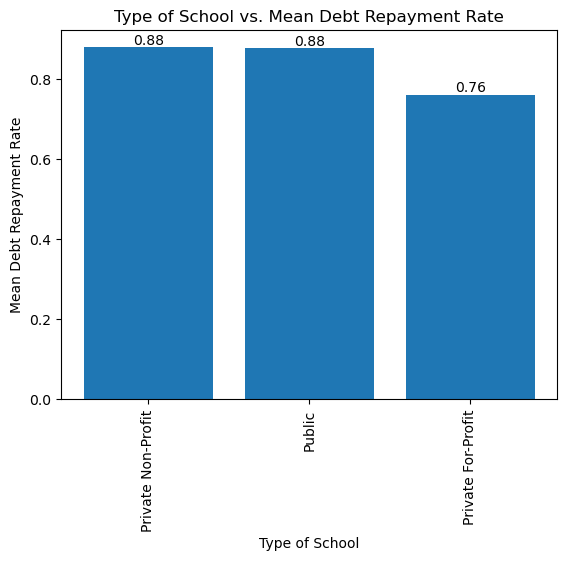

In [179]:
#bar chart for school type vs. mean debt repayment rate
bar_label=type_mean_df['Debt repayment rate among grads - 5 years'].values.tolist()
bar_label= [ '%.2f' % elem for elem in bar_label ]

barplot = plt.bar(type_mean_df["Type of School"], type_mean_df['Debt repayment rate among grads - 5 years'])
plt.xlabel("Type of School")
plt.ylabel("Mean Debt Repayment Rate")
plt.title("Type of School vs. Mean Debt Repayment Rate")
plt.bar_label(barplot,labels=bar_label, label_type="edge")
plt.xticks(rotation=90)
plt.savefig('Resources/Fig2ky.png', bbox_inches='tight') 
plt.show()

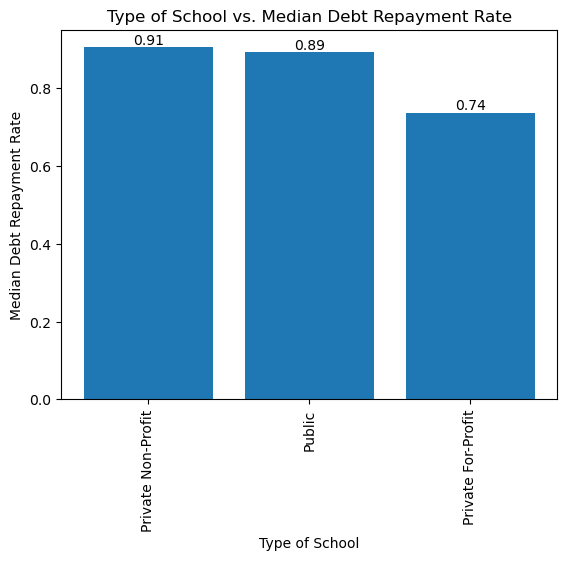

In [131]:
#bar chart for school type vs. median debt repayment rate
bar_label=type_med_df['Debt repayment rate among grads - 5 years'].values.tolist()
bar_label= [ '%.2f' % elem for elem in bar_label ]

barplot = plt.bar(type_med_df["Type of School"], type_med_df['Debt repayment rate among grads - 5 years'])
plt.xlabel("Type of School")
plt.ylabel("Median Debt Repayment Rate")
plt.title("Type of School vs. Median Debt Repayment Rate")
plt.bar_label(barplot,labels=bar_label, label_type="edge")
plt.xticks(rotation=90)
plt.show()

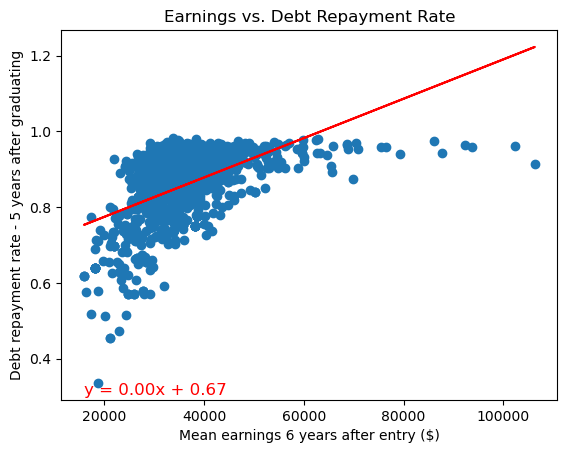

In [178]:
#scatter of repayment rate vs. earnings
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df['Mean earnings 6 years after school entry'], df['Debt repayment rate among grads - 5 years'])

# Get regression values
regress_values = df['Mean earnings 6 years after school entry'] * slope + intercept

#plot data

plt.scatter(df['Mean earnings 6 years after school entry'], df['Debt repayment rate among grads - 5 years'], marker='o')
plt.xlabel("Mean earnings 6 years after entry ($)")
plt.ylabel("Debt repayment rate - 5 years after graduating")
plt.title("Earnings vs. Debt Repayment Rate")
plt.plot(df['Mean earnings 6 years after school entry'], regress_values, "r-")


equation =f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(df['Mean earnings 6 years after school entry'].min(), df['Debt repayment rate among grads - 5 years'].min(),
         equation, fontsize=12, color='red', ha='left', va='top')

plt.savefig('Resources/Fig4ky.png', bbox_inches='tight') 
plt.show()

In [87]:
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)

5.196928418534044e-06
0.6705449052781953
0.49304068002991996
5.284127334800472e-89
2.419123127130167e-07


In [164]:
#pulling data by major

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

major_list=['Bachelor of Agriculture',
            'Bachelor of Ethnic, Cultural or Gender Studies',
            'Bachelor of Comms - Journalism',
            'Bachelor of Comp Sci / IT',
            'Bachelor of Education',
            'Bachelor of Engineering',
            'Bachelor of English',
            'Bachelor of Bio / Biomedical Sci',
            'Bachelor of Math',
            'Bachelor of Philosophy/Religion',
            'Bachelor of Psychology',
            'Bachelor of Social Science',
            'Bachelor of Visual / Performing Arts',
            'Bachelor of Business / Marketing',
            'Bachelor of History']

mean_value=0
med_value=0
major_df =pd.DataFrame(columns=['Major',"Mean","Median"])

for x in major_list:
    mean_value=df.loc[df[x]==1, 'Debt repayment rate among grads - 5 years'].mean()
    med_value=df.loc[df[x]==1, 'Debt repayment rate among grads - 5 years'].median()
    major_df = major_df.append({'Major': x, "Mean": mean_value, "Median": med_value},ignore_index=True)
    mean_value=0
    med_value=0
    
major_df


,Major,Mean,Median
0,Bachelor of Agriculture,0.880729,0.896382
1,"Bachelor of Ethnic, Cultural or Gender Studies",0.904667,0.917795
2,Bachelor of Comms - Journalism,0.882851,0.898922
3,Bachelor of Comp Sci / IT,0.858082,0.882484
4,Bachelor of Education,0.879589,0.899343
5,Bachelor of Engineering,0.895869,0.912614
6,Bachelor of English,0.885549,0.902834
7,Bachelor of Bio / Biomedical Sci,0.882341,0.902439
8,Bachelor of Math,0.885470,0.902439
9,Bachelor of Philosophy/Religion,0.893797,0.908080


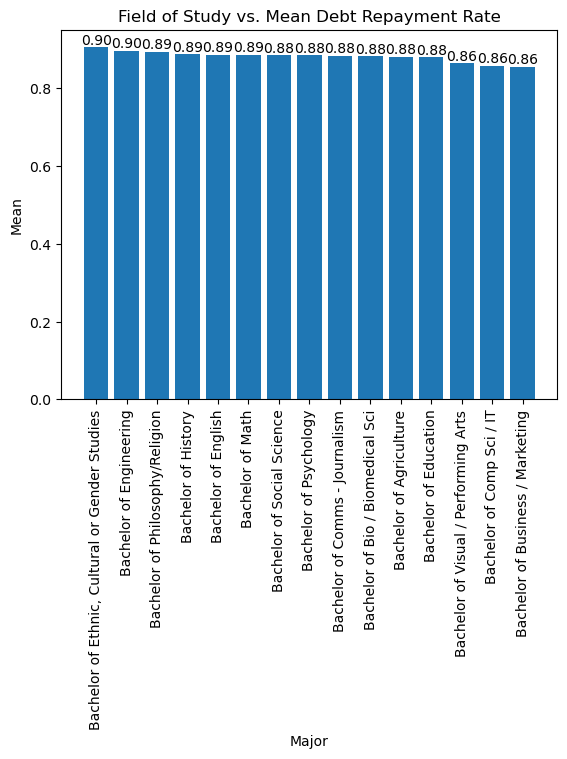

In [177]:
#Major vs. mean debt repayment rate

major_df = major_df.sort_values(by="Mean", ascending=False)

bar_label=major_df['Mean'].values.tolist()
bar_label= [ '%.2f' % elem for elem in bar_label ]

barplot = plt.bar(major_df['Major'], major_df["Mean"])
plt.xlabel("Major")
plt.ylabel("Mean")
plt.title("Field of Study vs. Mean Debt Repayment Rate")
plt.bar_label(barplot,labels=bar_label, label_type="edge")
plt.xticks(rotation=90)
plt.savefig('Resources/Fig3ky.png', bbox_inches='tight') 
plt.show()


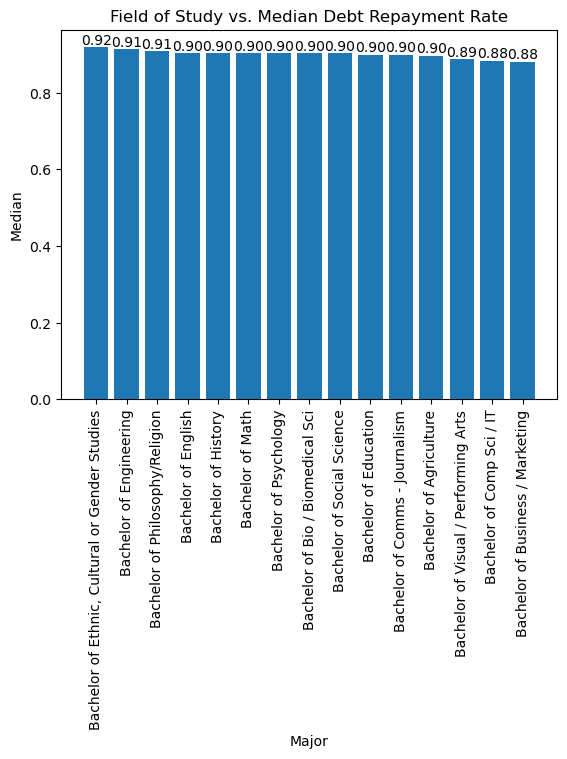

In [134]:
#Major vs. median debt repayment rate

major_df = major_df.sort_values(by="Median", ascending=False)

bar_label=major_df['Median'].values.tolist()
bar_label= [ '%.2f' % elem for elem in bar_label ]

barplot = plt.bar(major_df['Major'], major_df["Median"])
plt.xlabel("Major")
plt.ylabel("Median")
plt.title("Field of Study vs. Median Debt Repayment Rate")
plt.bar_label(barplot,labels=bar_label, label_type="edge")
plt.xticks(rotation=90)
plt.show()